In [1]:
import qiskit

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [6]:
import qiskit
qiskit.__version__


AttributeError: module 'qiskit' has no attribute '__version__'

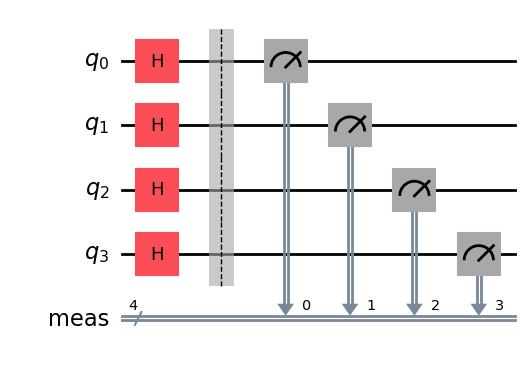

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
num_qubits = 4
qc = QuantumCircuit(num_qubits)
 
# Add a Hadamard gate to qubit 0
for qubit in range(num_qubits):
    qc.h(qubit)
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.measure_all()
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")


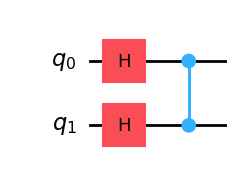

In [13]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit

from qiskit import QuantumCircuit

# import basic plot tools
from qiskit.visualization import plot_histogram

n = 2
grover_circuit = QuantumCircuit(n)
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

grover_circuit = initialize_s(grover_circuit, [0,1])

grover_circuit.cz(0,1) # Oracle
grover_circuit.draw("mpl")

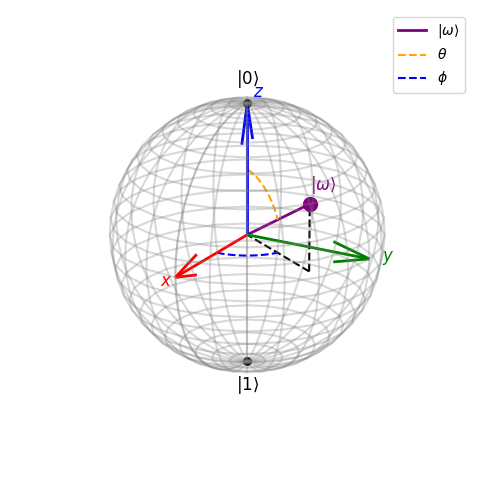

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a mesh grid for the sphere
theta_s, phi_s = np.mgrid[0:np.pi:25j, 0:2*np.pi:25j]
x_s = np.sin(theta_s) * np.cos(phi_s)
y_s = np.sin(theta_s) * np.sin(phi_s)
z_s = np.cos(theta_s)

# Define the quantum state point in spherical coordinates
theta =  np.pi / 3  # Angle for equal distance from x, y, z axes
phi = np.pi / 3                  # Angle for equal distance from x and y axes
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Initialize the 3D plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the sphere
ax.plot_wireframe(x_s, y_s, z_s, color='gray', alpha=0.3)

# Draw axes
ax.quiver(0, 0, 0, 1, 0, 0, color='r', linewidth=2)  # X-axis (red)
ax.quiver(0, 0, 0, 0, 1, 0, color='g', linewidth=2)  # Y-axis (green)
ax.quiver(0, 0, 0, 0, 0, 1, color='b', linewidth=2)  # Z-axis (blue)

# Plot the quantum state |omega⟩
ax.scatter([x], [y], [z], color='purple', s=100)
ax.text(x, y, z+0.1, r'$|\omega\rangle$', fontsize=12, color='purple')

# Draw line from center to |omega⟩
ax.plot([0, x], [0, y], [0, z], 'purple', linewidth=2, label=r'$|\omega\rangle$')

# Draw dotted projections
ax.plot([x, x], [y, y], [0, z], 'k--')  # Z-plane projection
ax.plot([x, 0], [y, 0], [0, 0], 'k--')  # XY-plane projection

arc_radius = 0.5  # Radius for drawing arcs

# Draw angle θ (arc from z-axis to |omega⟩)
theta_arc = np.linspace(0, theta, 30)
x_theta = arc_radius * np.sin(theta_arc) * np.cos(phi)
y_theta = arc_radius * np.sin(theta_arc) * np.sin(phi)
z_theta = arc_radius * np.cos(theta_arc)
ax.plot(x_theta, y_theta, z_theta, linestyle='--', color='orange', label=r'$\theta$')

# Draw angle φ (arc in xy-plane)
phi_arc = np.linspace(0, phi, 30)
x_phi = arc_radius * np.sin(theta) * np.cos(phi_arc)
y_phi = arc_radius * np.sin(theta) * np.sin(phi_arc)
z_phi = np.zeros_like(phi_arc)
ax.plot(x_phi, y_phi, z_phi, linestyle='--', color='blue', label=r'$\phi$')


# Add dots at the top and bottom of the sphere
ax.scatter([0], [0], [1], color='black', s=30)  # Top dot (north pole)
ax.scatter([0], [0], [-1], color='black', s=30)  # Bottom dot (south pole)

# Add labels
ax.text(0, 0, 1.1, r'$|0\rangle$', fontsize=12, color='black', ha='center', va='bottom')  # Label for top dot
ax.text(0, 0, -1.1, r'$|1\rangle$', fontsize=12, color='black', ha='center', va='top')  # Label for bottom dot
ax.text(1.2, 0, 0, r'$x$', fontsize=12, color='red')
ax.text(0, 1.1, 0, r'$y$', fontsize=12, color='green')
ax.text(0, 0.05, 1.05, r'$z$', fontsize=12, color='blue')


# Set plot limits and labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_box_aspect([1,1,1])  # Equal aspect ratio
ax.set_axis_off()
ax.legend()

# Set the viewing angle (elevation and azimuth)
ax.view_init(elev=20, azim=30)  # Adjust these values to change the view

plt.show()

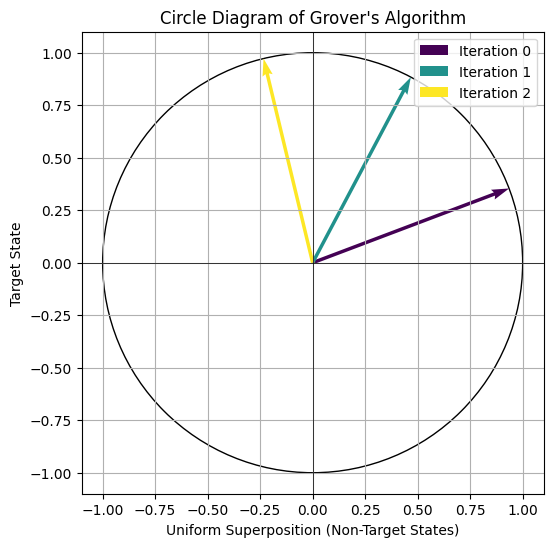

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_states = 8  # Total number of states in the search space
theta = 2 * np.arcsin(1 / np.sqrt(num_states))  # Angle between initial and target state
num_iterations = 2  # Number of Grover iterations (optimal is ~pi/4 * sqrt(N))

# Initial state: Uniform superposition of non-target states
initial_state = np.cos(theta / 2)  # Amplitude of non-target states
target_state = np.sin(theta / 2)   # Amplitude of target state

# Grover iteration: Rotate the state vector by theta
states_history = [(initial_state, target_state)]  # Store states for visualization

for _ in range(num_iterations):
    # Apply Grover's iteration (rotation by theta)
    new_initial = np.cos(theta) * initial_state - np.sin(theta) * target_state
    new_target = np.sin(theta) * initial_state + np.cos(theta) * target_state
    initial_state, target_state = new_initial, new_target
    states_history.append((initial_state, target_state))  # Save the state

# Plot the circle diagram
plt.figure(figsize=(6, 6))
ax = plt.gca()

# Draw the circle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_patch(circle)

# Plot the state vector after each iteration
colors = plt.cm.viridis(np.linspace(0, 1, len(states_history)))
for i, (init, target) in enumerate(states_history):
    ax.quiver(0, 0, init, target, angles='xy', scale_units='xy', scale=1, color=colors[i], label=f'Iteration {i}')

# Add labels and title
ax.set_xlabel('Uniform Superposition (Non-Target States)')
ax.set_ylabel('Target State')
ax.set_title('Circle Diagram of Grover\'s Algorithm')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_aspect('equal')
ax.legend()
plt.grid(True)
plt.show()